In [1]:
hearing_data <- read.csv("data//hearing_f.csv")
hearing_data

Animal,Taxonomy,hearing_min,hearing_max,voc_min,voc_max,Source_hearing,Source_voc
<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
Baleen whales (estimated),Baleen whale,10,22000,12,10000,"Siebert et al., 2014","Debich et al., 2012"
Blainville's beaked whale,Toothed whale,50,80000,NA,NA,AAD,"Siebert et al., 2014"
Orca,Toothed whale,2000,100000,6000,12000,AAD,"Siebert et al., 2015"
Beluga,Toothed whale,10,100000,NA,NA,AAD,"Siebert et al., 2016"
California sea lion,Pinniped,200,30000,NA,NA,AAD,"Siebert et al., 2017"
Chinese white dolphin,Toothed whale,10000,120000,NA,NA,AAD,"Siebert et al., 2018"
Common bottlenose dolphin,Toothed whale,20000,120000,NA,NA,AAD,"Siebert et al., 2019"
False killer whale,Toothed whale,4000,50000,NA,NA,AAD,"Siebert et al., 2020"
Harbour porpoise,Toothed whale,1000,150000,NA,NA,AAD,"Siebert et al., 2021"


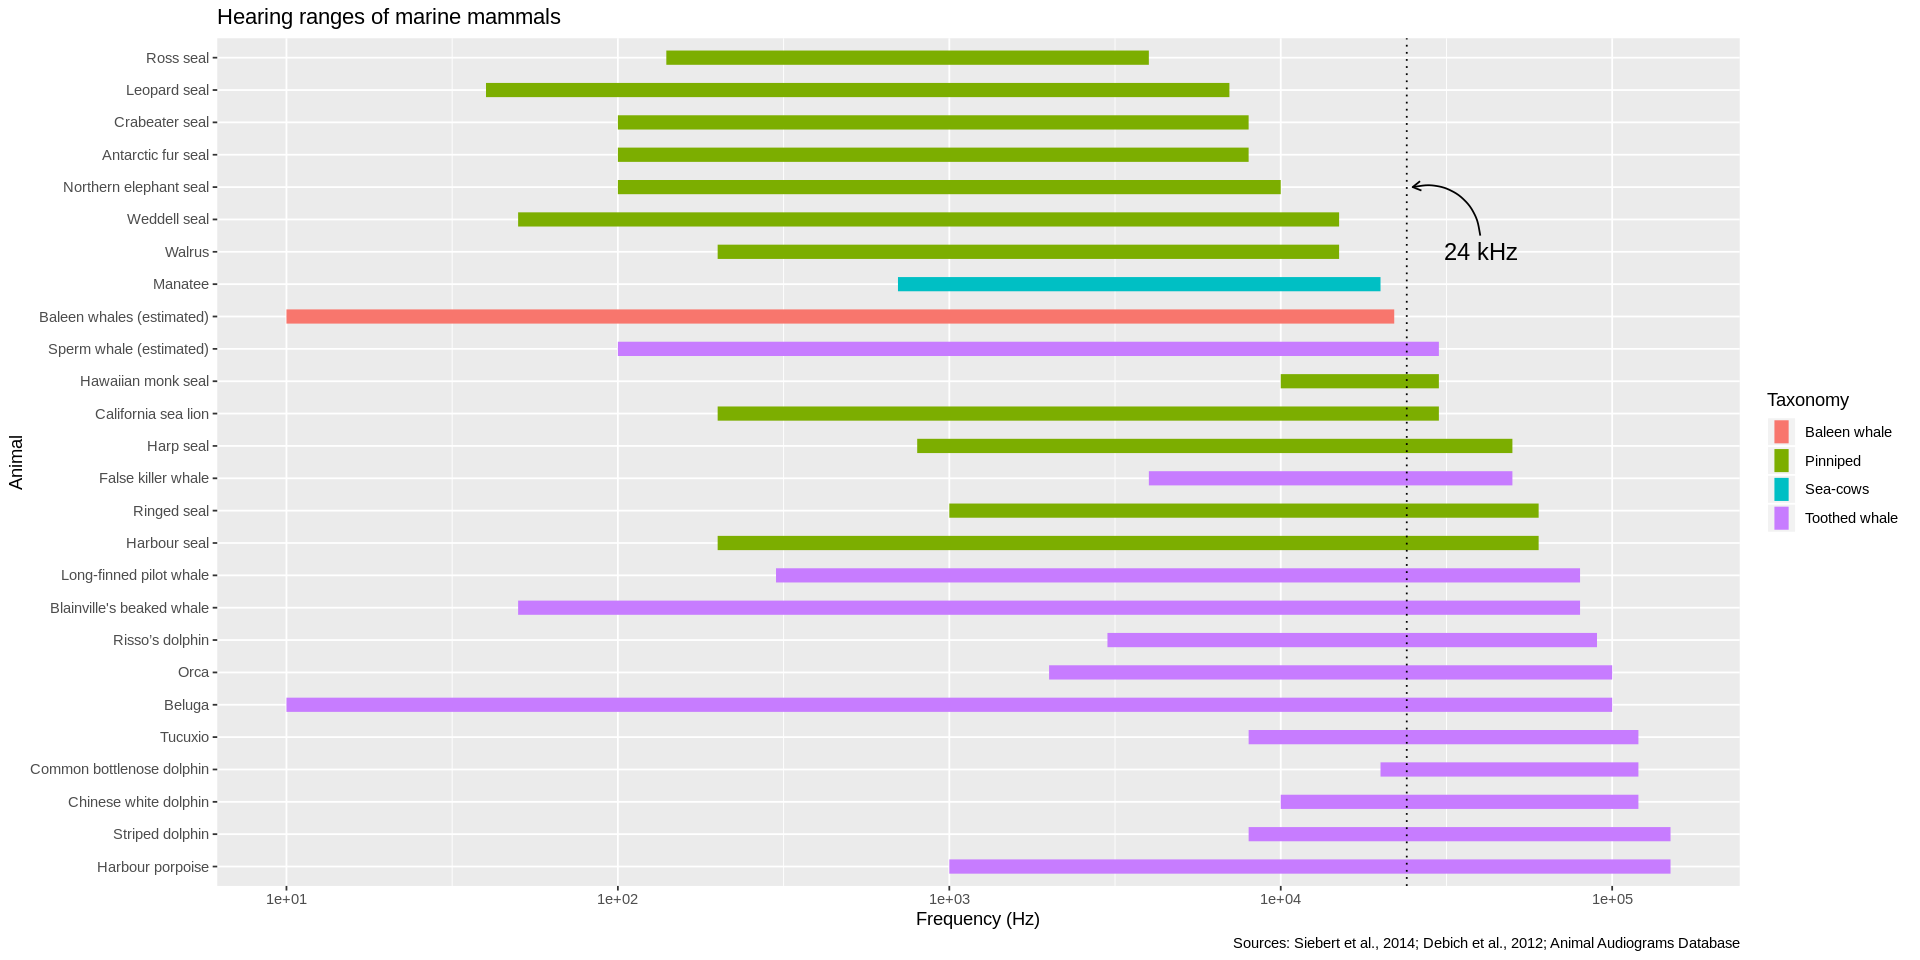

In [7]:
# plot ranges
library(ggplot2)
library(repr)

options(repr.plot.width=16, repr.plot.height=8)

hearing_plot <- ggplot(hearing_data, aes(x=reorder(Animal, -hearing_max), ymin = hearing_min, ymax = hearing_max, color = Taxonomy)) +
    geom_linerange(size = 4) + 
    scale_y_log10() +
    labs(
        title = "Hearing ranges of marine mammals", 
        x="Animal",
        y="Frequency (Hz)", 
        caption="Sources: Siebert et al., 2014; Debich et al., 2012; Animal Audiograms Database") +
    coord_flip()

hearing_annotated_plot <- hearing_plot + 
    geom_hline(yintercept = 24000, linetype=3) + # coords are flipped
    annotate("text", x=20, y=24000, label="24 kHz", hjust=-0.5, size=5) +
    annotate("curve", 
             x=20.5, y=40000, xend=22, yend=25000, 
             arrow=arrow(length=unit(0.2, "cm")))
    
#png("images/hearing_ranges.png", width=1280, height=640, res=120)
hearing_annotated_plot
#dev.off()